In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [3]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


For this assignment, all questions will be involving the total_revenue and total_expenditure variables. For this reason, I will only impute missing values for these variables

In [4]:
variables = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']

education_df[variables].isnull().sum()/education_df[variables].isnull().count()*100

TOTAL_REVENUE        14.209115
TOTAL_EXPENDITURE    14.209115
dtype: float64

~14% of data is missing from each variable. Check where data is missing from.

In [5]:
education_df.groupby('YEAR')[variables].count()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
YEAR,,
1992,51,51
1993,51,51
1994,51,51
1995,51,51
1996,51,51
1997,51,51
1998,51,51
1999,51,51
2000,51,51


2017 was the only year that had missing values, although the number of states included each year varies as well. Replace with an appropriate measure of central tendency for the overall data for these variables.

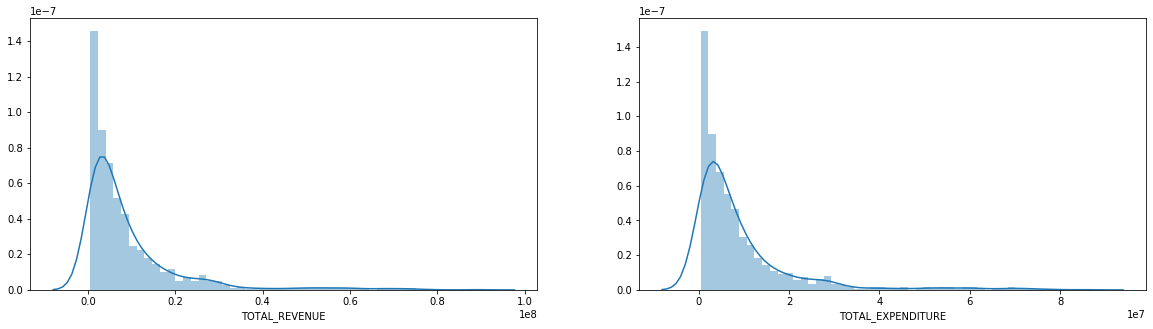

In [6]:
#Check distributions to determine appropriate estimate of central tendency

fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.distplot(education_df['TOTAL_REVENUE'].dropna(), ax=axes[0])
sns.distplot(education_df['TOTAL_EXPENDITURE'].dropna(), ax=axes[1])

plt.show()

# Impute missing values

The boxplots clearly show a right-skewed distribution so imputing a mean value would be innapropriate. I will impute missing values with a median value.

In [7]:
df2 = education_df[variables].copy(deep=True)

for variable in variables:
        df2.loc[:, variable].fillna(df2[variable].median(),inplace=True)

In [8]:
#Check that missing values have been replaced

df2.isnull().sum()/df2.isnull().count()*100

TOTAL_REVENUE        0.0
TOTAL_EXPENDITURE    0.0
dtype: float64

# 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

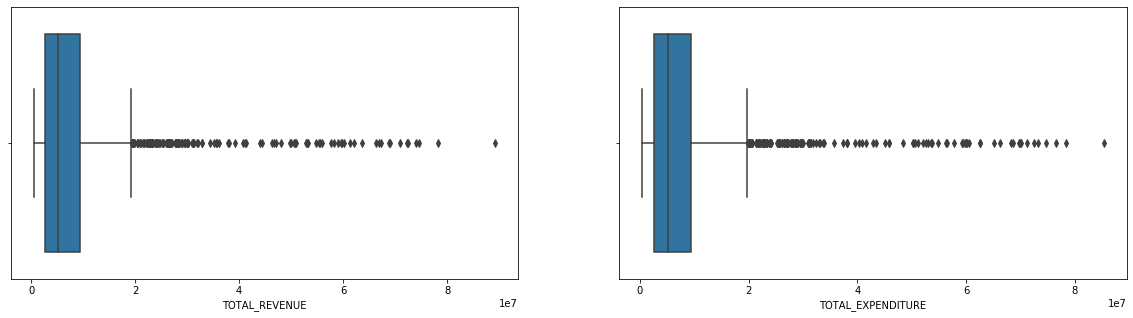

In [9]:
#Yes, plenty of outliers

fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(df2['TOTAL_REVENUE'], ax=axes[0])
sns.boxplot(df2['TOTAL_EXPENDITURE'], ax=axes[1])

plt.show()

# 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

Steps
    1. Dropping outliers
    2. Winsorize
    3. Transforming outliers

In [10]:
#Create threshold function which finds Tukey's outlier threshold given dataset

def threshold(data):
        t = data.quantile(0.75)+1.5*(data.quantile(0.75)-data.quantile(0.25))
        return t

First, I will simply drop the outliers

In [11]:
#Loop through df and change outliers to nan, drop nans
#The threshold will change every time data is removed, so a while loop is needed and it's slowwww

dropped_df = df2.copy(deep=True)

for col in dropped_df:
    while max(dropped_df[col]) > threshold(dropped_df[col]):
        for i in range(len(dropped_df[col])):
            if dropped_df.loc[i,col] > threshold(dropped_df[col]):
                dropped_df.loc[i,col] = np.nan

dropped_df.dropna(inplace=True)

In [12]:
len(df2)-len(dropped_df)

352

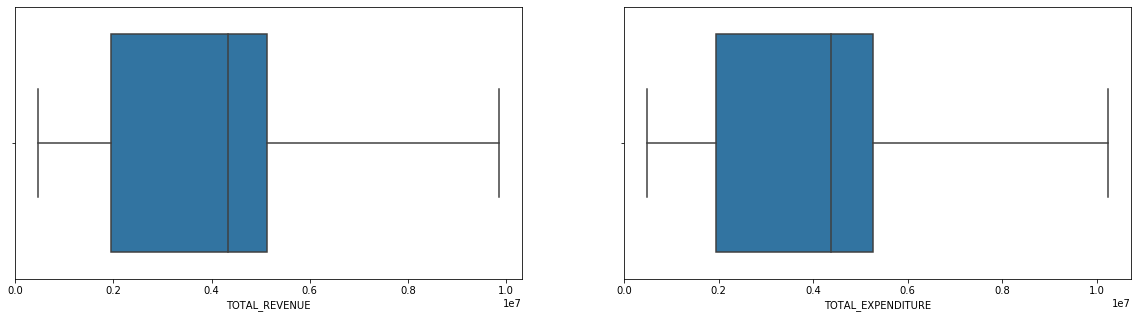

In [13]:
#Dropping the 352 outliers resulted in no remaining outliers

fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(dropped_df['TOTAL_REVENUE'], ax=axes[0])
sns.boxplot(dropped_df['TOTAL_EXPENDITURE'], ax=axes[1])

plt.show()

Winsorize

In [14]:
from scipy.stats.mstats import winsorize

In [15]:
winsorized_df = winsorize(df2, (0, 0.11))
winsorized_df = pd.DataFrame(winsorized_df, columns=variables)

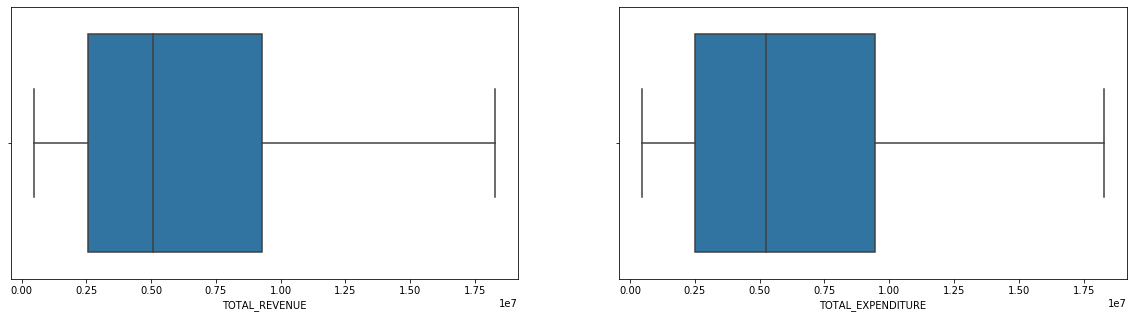

In [16]:
#When winsorization was set to occur between the 0th and 89th percentiles, no outliers remained

fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(winsorized_df['TOTAL_REVENUE'], ax=axes[0])
sns.boxplot(winsorized_df['TOTAL_EXPENDITURE'], ax=axes[1])

plt.show()

In [17]:
transformed_df = df2.copy(deep=True)

for col in transformed_df:
    transformed_df[col] = np.log(transformed_df[col])

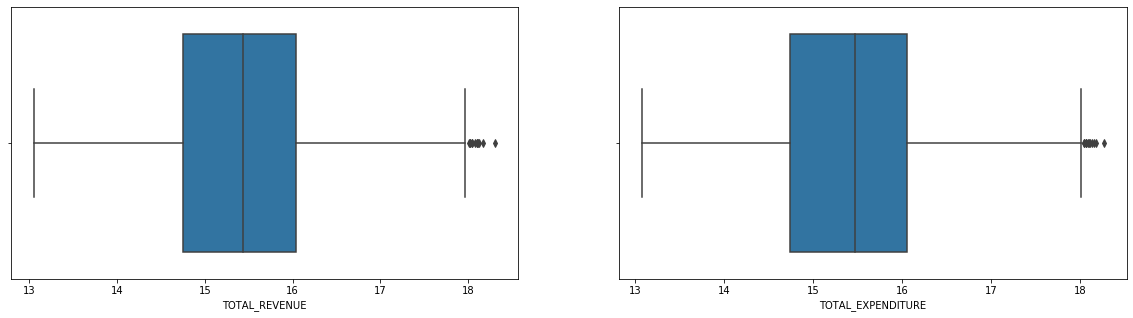

In [18]:
#When log transformation was done on the data, the distribution appeared much less skewed but some outliers remained

fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(transformed_df['TOTAL_REVENUE'], ax=axes[0])
sns.boxplot(transformed_df['TOTAL_EXPENDITURE'], ax=axes[1])

plt.show()

# 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [19]:
df2['budget'] = df2['TOTAL_REVENUE']-df2['TOTAL_EXPENDITURE']

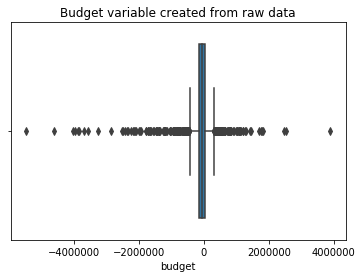

In [38]:
sns.boxplot(df2['budget'])
plt.title('Budget variable created from raw data')
plt.show()

Clearly there are plenty of outliers on both sides of the distributions, a winsorized approach would be the most appropriate for this data.

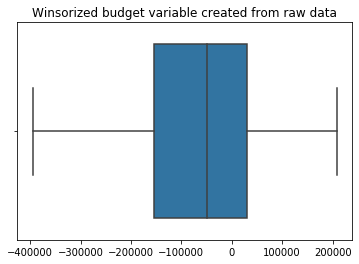

In [42]:
#Winsorize between the 10th-90th percentiles

winsorized_budget = winsorize(df2['budget'], (0.1))
winsorized_budget = pd.DataFrame(winsorized_budget, columns=['budget'])

sns.boxplot(winsorized_budget)
plt.title('Winsorized budget variable created from raw data')
plt.show()

# 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

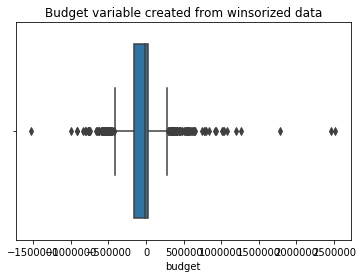

In [43]:
winsorized_df['budget'] = winsorized_df['TOTAL_REVENUE']-winsorized_df['TOTAL_EXPENDITURE']

sns.boxplot(winsorized_df['budget'])
plt.title('Budget variable created from winsorized data')
plt.show()

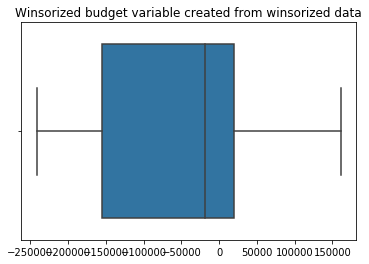

In [44]:
#Winsorize between the 10th-90th percentiles

winsorized_budget2 = winsorize(winsorized_df['budget'], (0.1))
winsorized_budget2 = pd.DataFrame(winsorized_budget2, columns=['budget'])

sns.boxplot(winsorized_budget2)
plt.title('Winsorized budget variable created from winsorized data')
plt.show()

# 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [54]:
print('Winsorized budget variable created from raw data' + '\n' + str(winsorized_budget.describe()))
print('\nWinsorized budget variable created from winsorized data' + '\n' + str(winsorized_budget2.describe()))
print('\nBudget 1 - Budget 2' + '\n' + str(winsorized_budget.describe() - winsorized_budget2.describe()))

Winsorized budget variable created from raw data
              budget
count    1492.000000
mean   -73456.128016
std    174726.569237
min   -395270.000000
25%   -154959.500000
50%    -48493.500000
75%     29654.250000
max    208528.000000

Winsorized budget variable created from winsorized data
              budget
count    1492.000000
mean   -45906.231903
std    121030.408874
min   -241611.000000
25%   -154959.500000
50%    -18938.000000
75%     19741.750000
max    161455.000000

Budget 1 - Budget 2
              budget
count       0.000000
mean   -27549.896113
std     53696.160362
min   -153659.000000
25%         0.000000
50%    -29555.500000
75%      9912.500000
max     47073.000000


# 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

There are clearly large differences between the two approaches. My gut tells me that unless the outlier variables are erroneous, any derived variables should be calculated from the raw data. The revenue and expenditure data does not seem to be erroneous, it just appears that there is a long-tailed right-skewed distribution due to the large differences seen in the US states. For this reason, I think the raw data should be used to calculate the budget variable and then f